# On regulation of model complexity

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as P
%matplotlib inline

We generate training data from a rather simple model, but with noise

In [3]:
N = 100
k = 5
np.random.seed(0)
x = np.linspace(-1, 1, N)
I = np.random.choice(N, k)
y = x * x
y[I] += 0.5

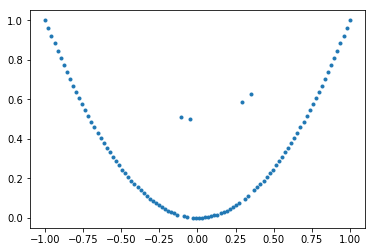

In [6]:
P.plot(x, y, '.');

# Define a neural network

In [97]:
layers = [10] * 10
class NN():
    pass
nn = NN()
nn.x = tf.placeholder(tf.float32, (N, 1))
nn.ref = tf.placeholder(tf.float32, (N, 1))
L  = tf.layers.dense(inputs=nn.x, units=layers[0], activation=tf.nn.tanh)
for i in range(1, len(layers)):
    L = tf.layers.dense(inputs=L, units=layers[i], activation=tf.nn.tanh)
nn.y = tf.layers.dense(inputs=L, units=1, activation=None)
nn.err = tf.reduce_sum(tf.pow(nn.ref - nn.y, 2)) / N

# Setup training

In [98]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(nn.err)
s = tf.Session()
s.run(tf.global_variables_initializer())

In [99]:
feed = {nn.x: x.reshape(N, 1), nn.ref: y.reshape(N, 1)}

In [100]:
epochs = 10000
for ep in range(epochs):
    err, _ = s.run((nn.err, optimizer), feed_dict=feed)
    if ep % (epochs / 10) == 0:
        print "[%d] %.5f" % (ep, err)
print "Done"

[0] 0.22782
[1000] 0.01154
[2000] 0.01033
[3000] 0.00981
[4000] 0.00952
[5000] 0.00934
[6000] 0.00923
[7000] 0.00916
[8000] 0.00911
[9000] 0.00908
Done


# Analyze the training

In [101]:
z = np.squeeze(s.run(nn.y, feed_dict=feed))

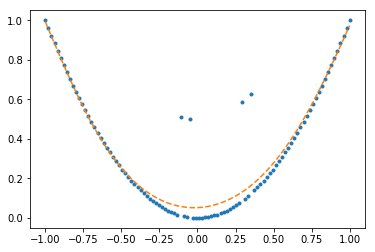

In [102]:
P.plot(x, y, '.', x, z, '--');